Data calling 

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\OneDrive\سطح المكتب\CS\Data Science\projict\data.csv")
print(df.head(60))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\OneDrive\\سطح المكتب\\CS\\Data Science\\projict\\data.csv'

Data information & NULL value checking 

In [2]:
print("shape:", df.shape)
print("col:", df.columns)
print(df.describe())
print("isnull:\n", df.isnull().sum())


shape: (569, 33)
col: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129 

Outlier detection


In [3]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Column: {col} → Outliers found: {len(outliers)}")


Column: id → Outliers found: 81
Column: radius_mean → Outliers found: 14
Column: texture_mean → Outliers found: 7
Column: perimeter_mean → Outliers found: 13
Column: area_mean → Outliers found: 25
Column: smoothness_mean → Outliers found: 6
Column: compactness_mean → Outliers found: 16
Column: concavity_mean → Outliers found: 18
Column: concave points_mean → Outliers found: 10
Column: symmetry_mean → Outliers found: 15
Column: fractal_dimension_mean → Outliers found: 15
Column: radius_se → Outliers found: 38
Column: texture_se → Outliers found: 20
Column: perimeter_se → Outliers found: 38
Column: area_se → Outliers found: 65
Column: smoothness_se → Outliers found: 30
Column: compactness_se → Outliers found: 28
Column: concavity_se → Outliers found: 22
Column: concave points_se → Outliers found: 19
Column: symmetry_se → Outliers found: 27
Column: fractal_dimension_se → Outliers found: 28
Column: radius_worst → Outliers found: 17
Column: texture_worst → Outliers found: 5
Column: perimete

Data Visualization


C:\Users\USER\AppData\Local\Temp\ipykernel_26232\1227578515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


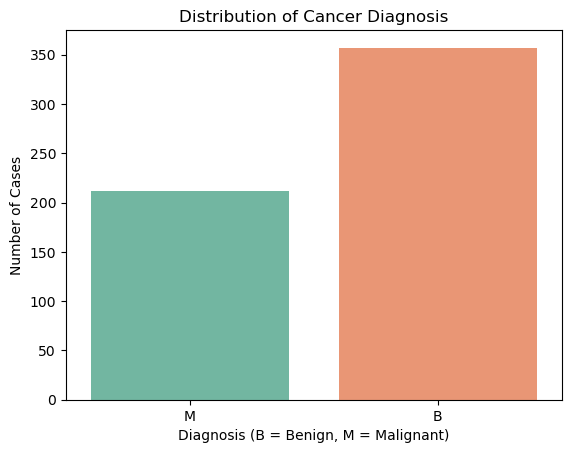

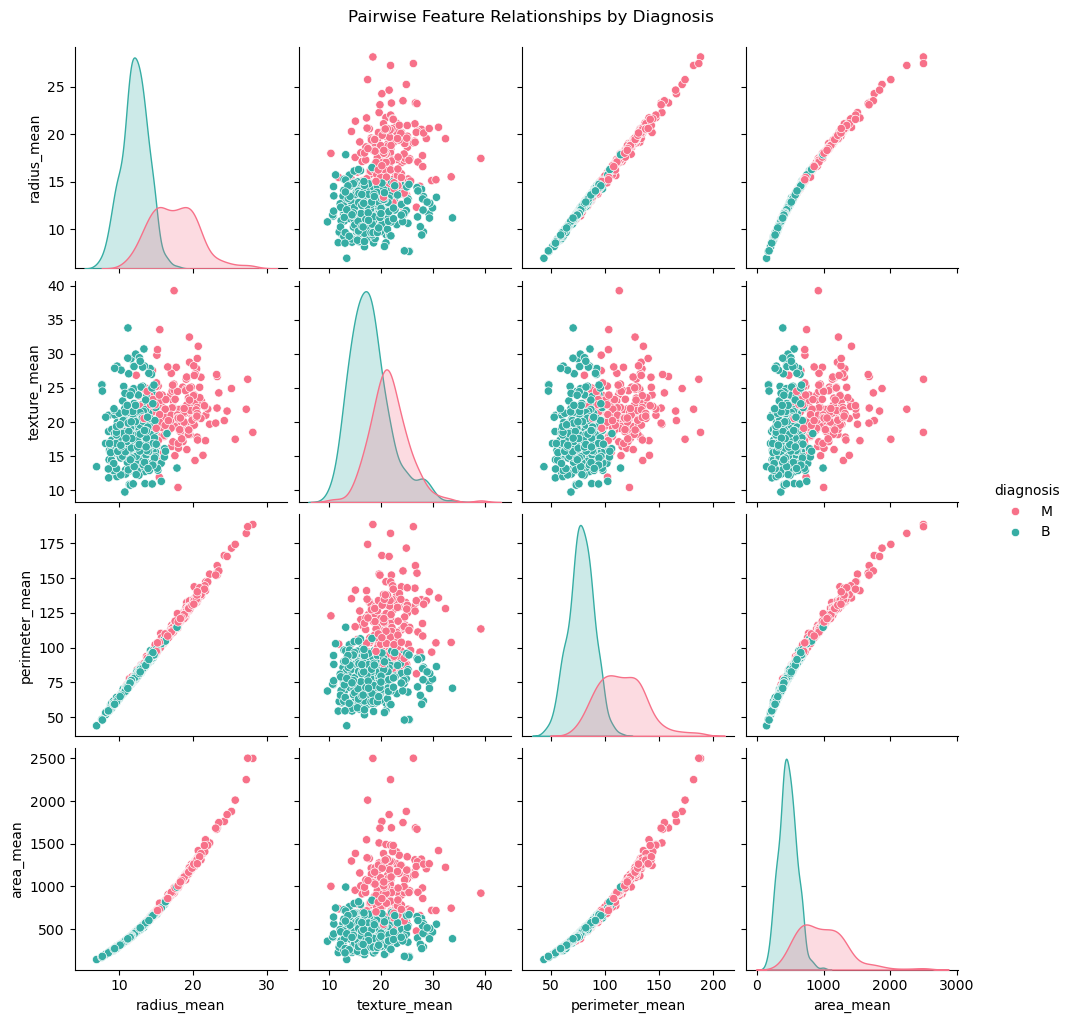

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Distribution of Cancer Diagnosis')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Number of Cases')
plt.show()
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[important_features], hue='diagnosis', palette='husl')
plt.suptitle("Pairwise Feature Relationships by Diagnosis", y=1.02)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_26232\2077297146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')


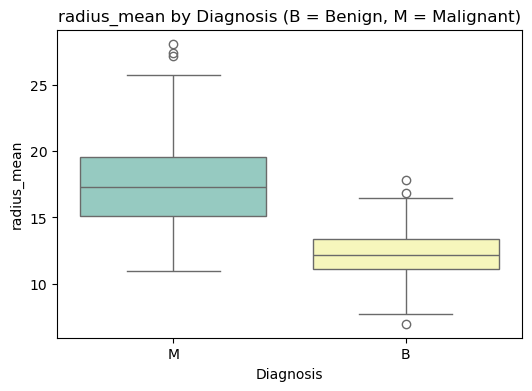

C:\Users\USER\AppData\Local\Temp\ipykernel_26232\2077297146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')


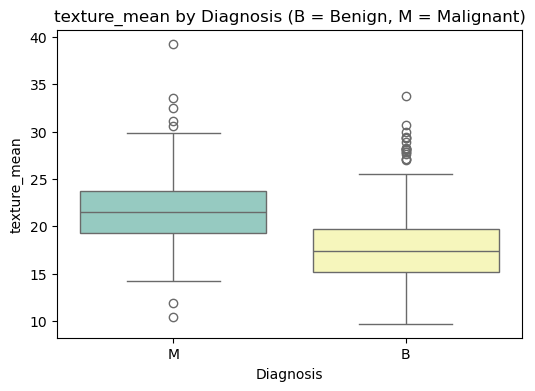

C:\Users\USER\AppData\Local\Temp\ipykernel_26232\2077297146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')


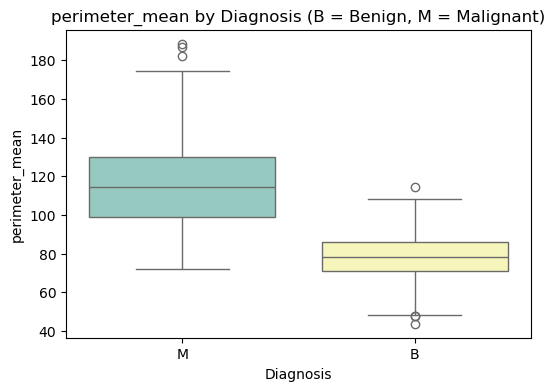

In [5]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} by Diagnosis (B = Benign, M = Malignant)')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.show()


Data Standardized

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_cols =df.select_dtypes(include=['float64', 'int64']).columns
df_standardized = df.copy()
scaler = StandardScaler()
df_standardized[numeric_cols] = scaler.fit_transform(df_standardized[numeric_cols])
print("Statistical summary after standardization:\n")
print(df_standardized[numeric_cols].describe())

Statistical summary after standardization:

          diagnosis   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean   4.995028e-17 -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -7.706085e-01 -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -7.706085e-01 -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -7.706085e-01 -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    1.297676e+00  4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    1.297676e+00  3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        

Modeling

 Accuracy: 0.956140350877193
 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        70
           1       1.00      0.89      0.94        44

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



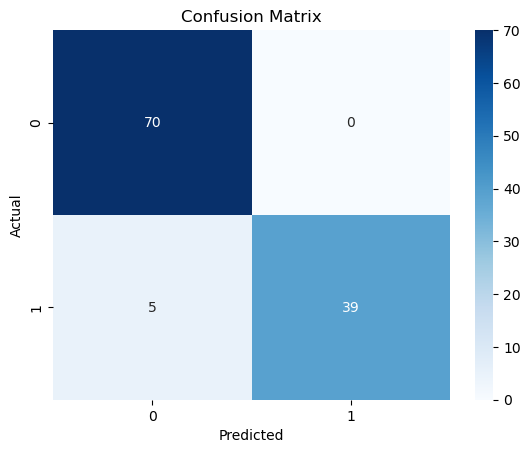

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

# B -> 0 , M -> 1
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])


X = df.drop('diagnosis', axis=1)
y = df['diagnosis'] # M or B
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=90)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear')  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


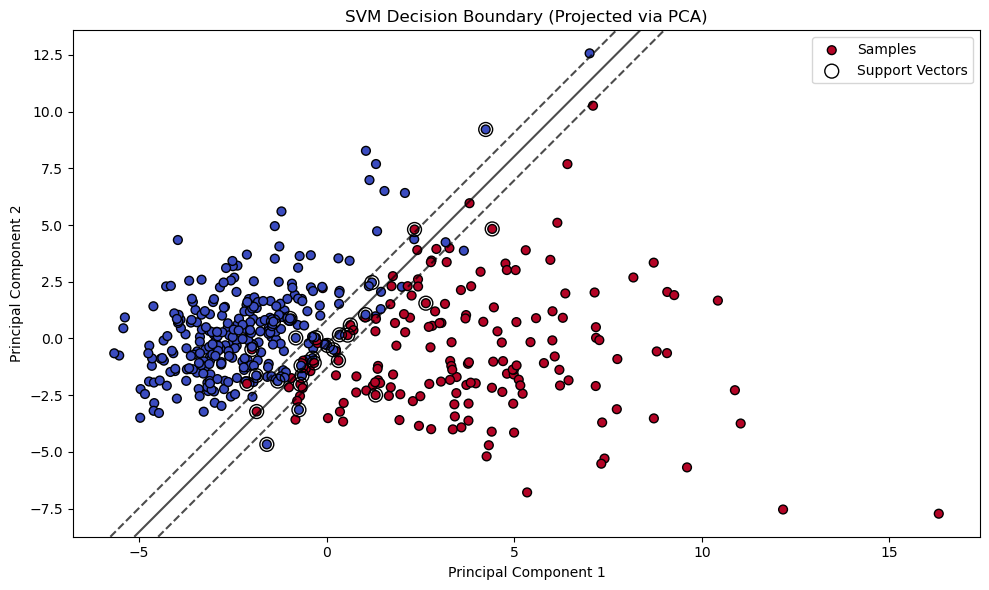

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def plot_svm_boundary(model, X, y):
    plt.figure(figsize=(10, 6))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=40, edgecolor='k', label='Samples')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    xy_original = pca.inverse_transform(xy)

    Z = model.decision_function(xy_original).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.7, linestyles=['--', '-', '--'])

    support_vectors_2d = pca.transform(model.support_vectors_)
    ax.scatter(support_vectors_2d[:, 0], support_vectors_2d[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Decision Boundary (Projected via PCA)')
    plt.legend()
    plt.tight_layout()
    plt.show()

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

plot_svm_boundary(model, X_train_2d, y_train)


optimization 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

param_grid = {'C': [0.1, 1, 2, 3, 10, 100, 1000]}

grid = GridSearchCV(svm_model, param_grid, verbose=3, cv=10)

grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)




Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ............................C=0.1;, score=0.978 total time=   0.0s
[CV 2/10] END ............................C=0.1;, score=1.000 total time=   0.0s
[CV 3/10] END ............................C=0.1;, score=0.978 total time=   0.0s
[CV 4/10] END ............................C=0.1;, score=0.978 total time=   0.0s
[CV 5/10] END ............................C=0.1;, score=0.978 total time=   0.0s
[CV 6/10] END ............................C=0.1;, score=0.956 total time=   0.0s
[CV 7/10] END ............................C=0.1;, score=0.978 total time=   0.0s
[CV 8/10] END ............................C=0.1;, score=1.000 total time=   0.0s
[CV 9/10] END ............................C=0.1;, score=0.956 total time=   0.0s
[CV 10/10] END ...........................C=0.1;, score=1.000 total time=   0.0s
[CV 1/10] END ..............................C=1;, score=0.978 total time=   0.0s
[CV 2/10] END ..............................C=1;

Cross-Validation

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
model = SVC(kernel='linear')
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
print("Average Accuracy:", cv_results['test_accuracy'].mean())
print("Average Precision:", cv_results['test_precision'].mean())
print("Average Recall:", cv_results['test_recall'].mean())
print("Average F1-score:", cv_results['test_f1'].mean())


Average Accuracy: 0.9801932367149758
Average Precision: 0.9888888888888889
Average Recall: 0.9580882352941176
Average F1-score: 0.9724675324675325


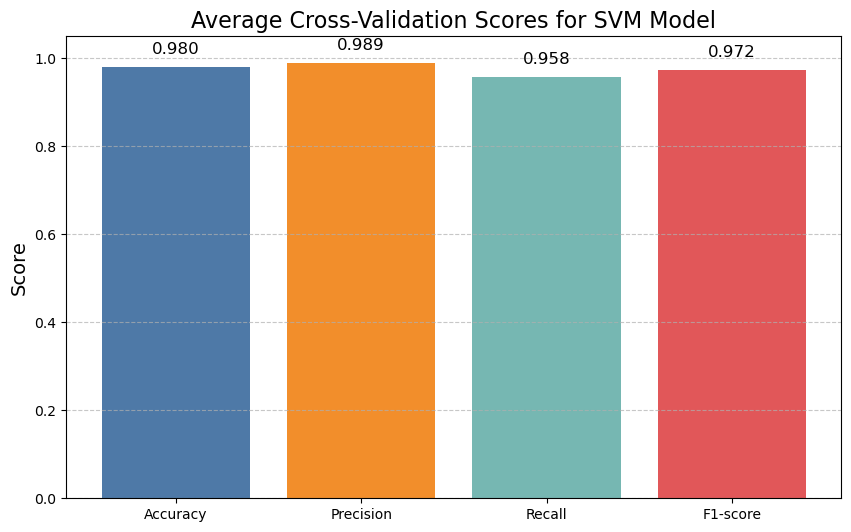

In [11]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = cv_results['test_accuracy'].mean()
precision = cv_results['test_precision'].mean()
recall = cv_results['test_recall'].mean()
f1 = cv_results['test_f1'].mean()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, scores, color=['#4e79a7', '#f28e2b', '#76b7b2', '#e15759'])

plt.ylim(0, 1.05) 
plt.title('Average Cross-Validation Scores for SVM Model', fontsize=16)
plt.ylabel('Score', fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.03, f'{height:.3f}', 
             ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
